**Importing necessary libraries**

In [183]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Loading the data**

In [184]:
df = pd.read_csv('Dataset/Mall_customers.csv')

In [185]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [186]:
df.shape

(200, 5)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [188]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [189]:
df.drop(['CustomerID', 'Gender', 'Age'], axis = 'columns', inplace = True)

In [190]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [191]:
df.skew()

Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

<Axes: >

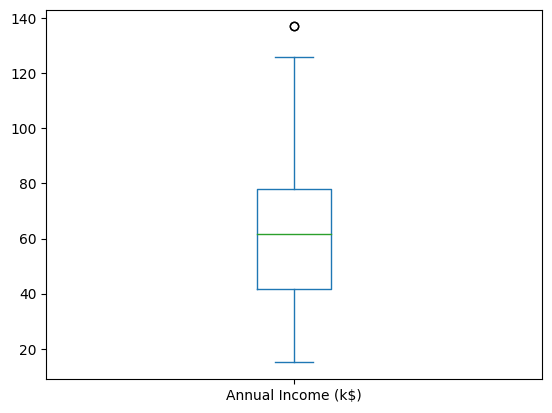

In [192]:
df['Annual Income (k$)'].plot(kind = 'box')

<Axes: >

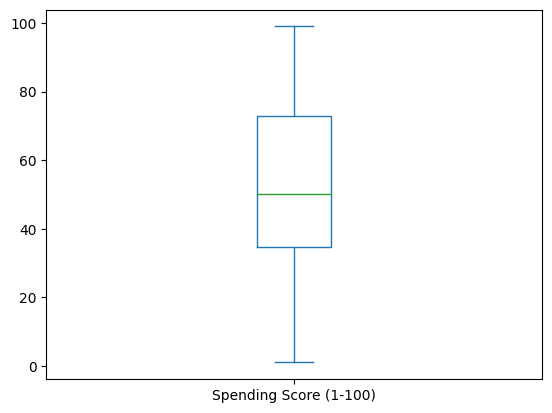

In [193]:
df['Spending Score (1-100)'].plot(kind = 'box')

In [194]:
scaler = StandardScaler()

In [195]:
scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns = df.columns)

In [196]:
scaled_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [197]:
sse = []
k_rng = range(1, 11)
for k in k_rng:
    km = KMeans(n_clusters = k, init = 'k-means++')
    km.fit(df)
    sse.append(km.inertia_)

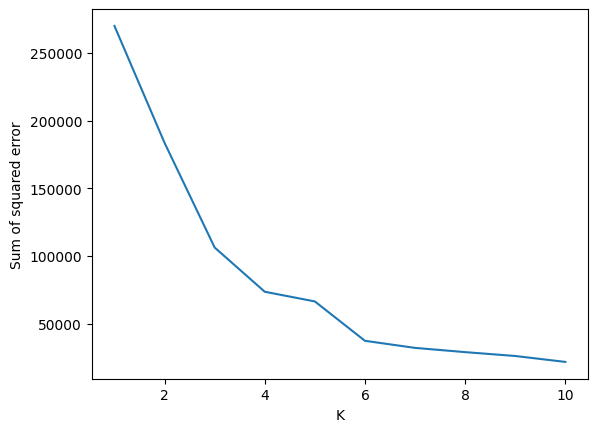

In [198]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

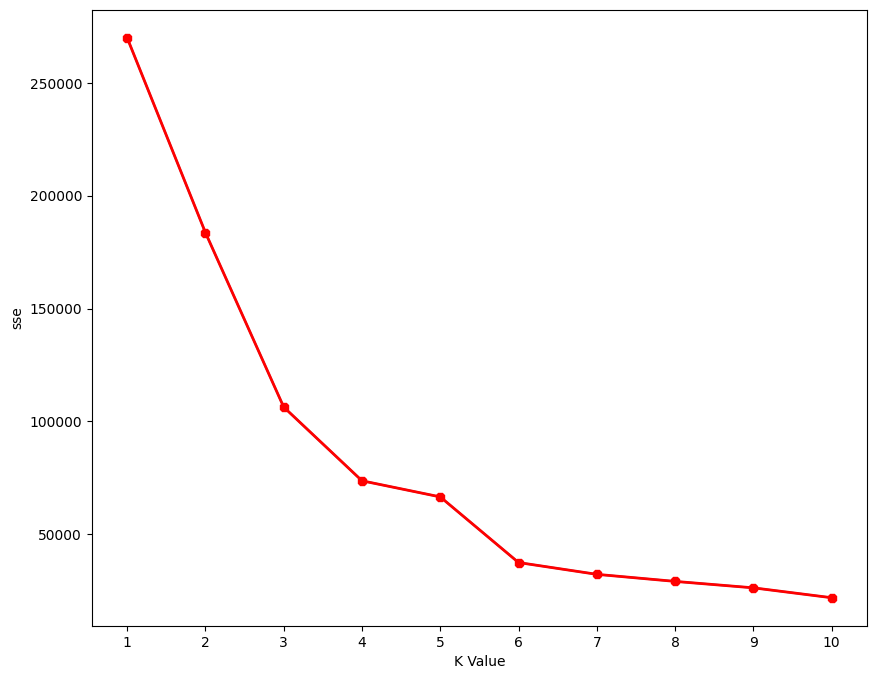

In [199]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11),sse)
plt.plot(range(1, 11), sse, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("sse")
plt.show()

In [200]:
km =KMeans(n_clusters = 6)
km.fit(scaled_df)
y = km.predict(scaled_df)

In [201]:
scaled_df["label"] = y

In [202]:
scaled_df.head()

,Annual Income (k$),Spending Score (1-100),label
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,3


C:\Users\Ankita Banerjee\AppData\Local\Temp\ipykernel_11592\843869244.py:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",


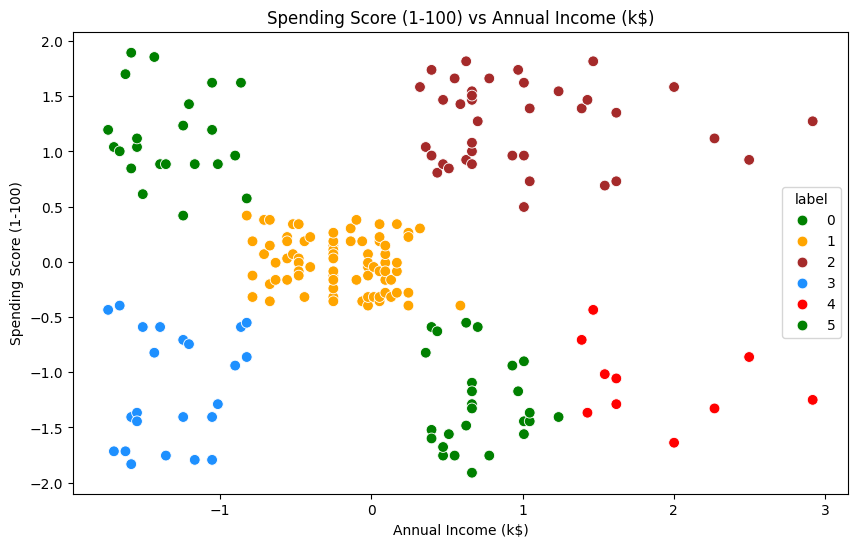

In [203]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = scaled_df  ,s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()